<a href="https://colab.research.google.com/github/sphuang28/Tibaml_11103_AI/blob/main/10_17_%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
前言 :

LATEX Math(論文好用)
(特殊轉換) 

ex:

Area=12πr2
'''

'\n前言 :\n\nLATEX Math(論文好用)\n(特殊轉換) \n\nex:\n\nArea=12πr2\n'

In [ ]:
'''
==================== AI 要電腦像人-->讓電腦學統計學

1.已定公式 
2.經驗累積與判斷(統計學) 
  統計學 1.機械學習(ML)=傳統統計 
        適合類型:結構型資料(表格類型) 
      2.深度學習(DL)=現代統計(模仿神經網路) 
        適合類型:抽象型(圖片,音樂,文字)

===================== AI 重要3大必殺技
1.classification(分類)
2.regression(回歸)
3.分群

補充
======== 統計學最重要的的一句 ==========
千萬不要"完美訓練"-->"過擬合" -> 太過稀少

'''

'\nAI:要電腦像人\n\n1.已定公式 \n2.經驗累積與判斷(統計學) \n  統計學 1.機械學習(ML)=傳統統計 \n        適合類型:結構型資料(表格類型) \n      2.深度學習(DL)=現代統計(模仿神經網路) \n        適合類型:抽象型(圖片,音樂,文字)\n\n'

In [ ]:
'''
===========================  10-17 機器人學習 classification(分類)
'''

'\nAI 重要3大必殺技\n1.classification(分類)\n2.回歸計算\n3.分群\n'

In [ ]:
# 統計需要資料量:
# ML: 1k以上  DL: 1w以上
# 資料量多寡 -> 問題難度(大概跟你欄位數目掛勾)
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["ans"] = iris["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# 處理資料: pandas -> DataFrame
# 進到sklearn: numpy -> array
import numpy as np
from sklearn.model_selection import train_test_split
x = df.drop("ans", axis=1)
x = np.array(x)
y = np.array(df["ans"])
# [90% x, 10% x, 90% y, 10% y]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [ ]:
# axis!!!! 
# a=0 橫 a=1 直
d = pd.DataFrame([
    [1, 2],
    [3, 4]
], columns=["a", "b"], index=["a", "b"])
d.drop("a", axis=1)

,b
a,2
b,4


In [ ]:
train_test_split([1, 2, 3, 4],
        [5, 6, 7, 8],
        test_size=0.25)

[[3, 4, 1], [2], [7, 8, 5], [6]]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'petal width (cm) <= 0.8\ngini = 0.666\nsamples = 135\nvalue = [45, 47, 43]\nclass = versicolor'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 45\nvalue = [45, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\ngini = 0.499\nsamples = 90\nvalue = [0, 47, 43]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.177\nsamples = 51\nvalue = [0, 46, 5]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.05\nsamples = 39\nvalue = [0, 1, 38]\nclass = virginica')]

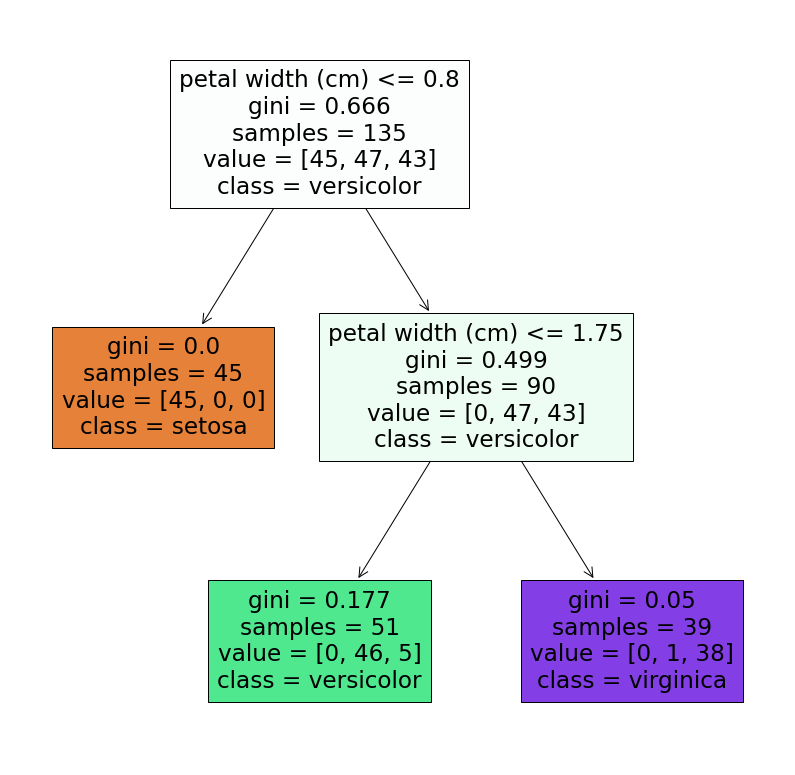

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(14, 14))
plot_tree(clf, 
     feature_names=iris["feature_names"], 
     filled=True,
     class_names=iris["target_names"])

In [ ]:
'''
評估標準
'''
from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)
accuracy_score(y_test, pre)



1.0

In [ ]:
'''

====== 決策樹(Decision trees)適用於classification(分類) 及 regression(回歸) 資料類型的預測

1.classification(分類)

找出讓信心度提高的分割點(信心指數提高)

gini=猜錯機率(越低越好)

gini=p1(1-p1)+p2(1-p2).....=pi(1-pi)


'''